# Settings

## Package Loading

In [1]:
%matplotlib inline
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import torch

## Toy Data

In [2]:
x = np.linspace(-10,10,100)

In [3]:
def fx(x):
	return(16*x*(1-x)*(1-2*x)**2*(1-8*x-8*x**2)**2)

# ↓ After Differentiation (Very Hard...)

def derivative(x):
    return(16 * (1 - 42*x + 408*x**2 - 976*x**3 + 640*x**4 - 3072*x**5 - 2048*x**7))

In [4]:
y = derivative(x)

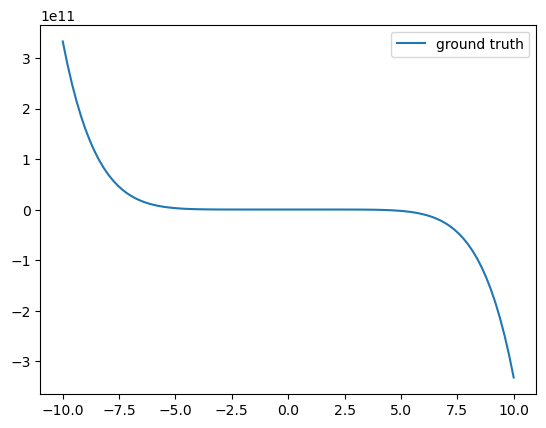

In [5]:
plt.plot(x, derivative(x), "-", label="ground truth")
plt.legend()

# Symbolic Differentiation

## Step.1: Define Variables

In [6]:
x_symbol = sy.Symbol('x')
x_symbol

x

In [7]:
fx(x_symbol)

16*x*(1 - 2*x)**2*(1 - x)*(-8*x**2 - 8*x + 1)**2

## Step.2: Perform Symbolic Differentiation

In [8]:
derivative_symbol = sy.diff(fx(x_symbol), x_symbol)
derivative_symbol

16*x*(1 - 2*x)**2*(1 - x)*(-32*x - 16)*(-8*x**2 - 8*x + 1) - 16*x*(1 - 2*x)**2*(-8*x**2 - 8*x + 1)**2 + 16*x*(1 - x)*(8*x - 4)*(-8*x**2 - 8*x + 1)**2 + 16*(1 - 2*x)**2*(1 - x)*(-8*x**2 - 8*x + 1)**2

In [9]:
sy.simplify(derivative_symbol)

-32768*x**7 + 49152*x**5 - 10240*x**4 - 15616*x**3 + 6528*x**2 - 672*x + 16

## Step.3: Evaluation (Symbol → Function)

In [10]:
y_symbol = np.array([derivative_symbol.subs(x_symbol, z) for z in x])

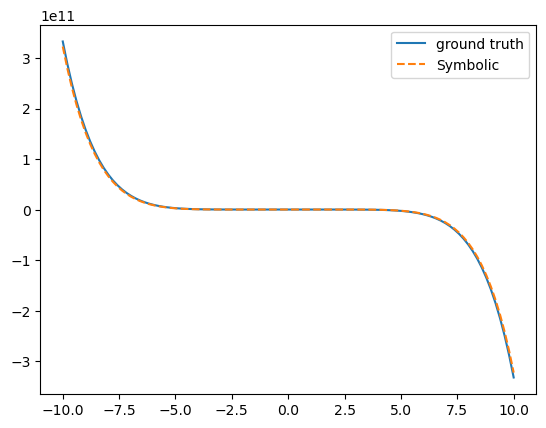

In [11]:
plt.plot(x, y, "-", label="ground truth")
plt.plot(x, y_symbol, "--", label="Symbolic")
plt.legend()

# Numeric Differentiation

In [12]:
y_numeric = np.gradient(fx(x), x)

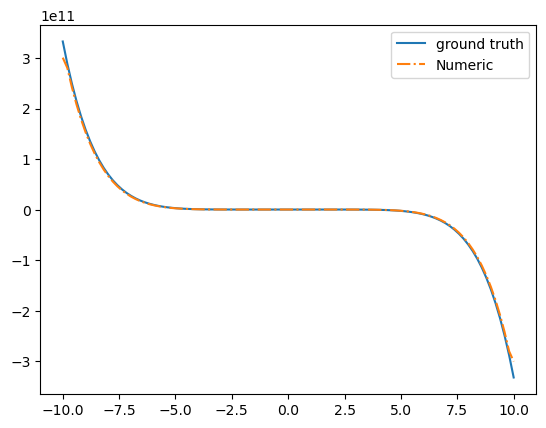

In [13]:
plt.plot(x, y, "-", label="ground truth")
plt.plot(x, y_numeric, "-.", label="Numeric")
plt.legend()

# Automatic Differentiation

In [14]:
y_torch = np.zeros(100)
for i in range(0, 100):
	x_torch = torch.tensor(x[i], requires_grad=True)
	fx_torch = fx(x_torch)
	fx_torch.backward()
	y_torch[i] = x_torch.grad

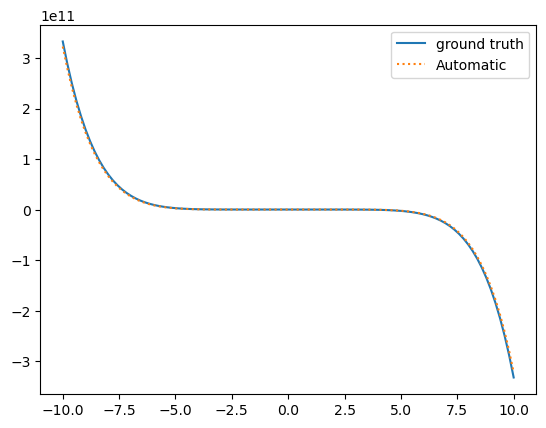

In [15]:
plt.plot(x, y, "-", label="ground truth")
plt.plot(x, y_torch, ":", label="Automatic")
plt.legend()

# All Results

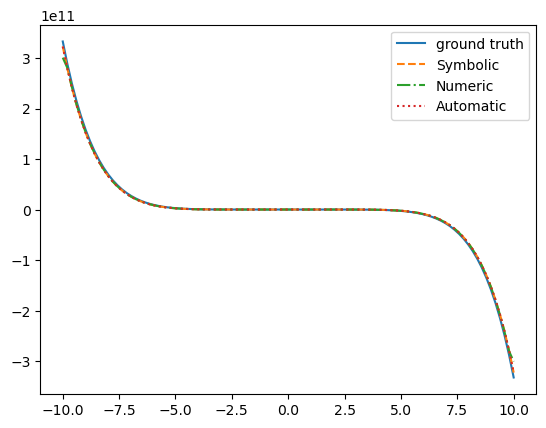

In [16]:
plt.plot(x, y, "-", label="ground truth")
plt.plot(x, y_symbol, "--", label="Symbolic")
plt.plot(x, y_numeric, "-.", label="Numeric")
plt.plot(x, y_torch, ":", label="Automatic")
plt.legend()